In [2]:
%pip install -U ipykernel
%pip install hdfs

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:

import json
from kafka import KafkaConsumer
from hdfs import InsecureClient

# Create a Kafka consumer
consumer = KafkaConsumer(
    'artists_data',  # Topic to subscribe to
    bootstrap_servers='localhost:9092',  # Kafka broker address
    value_deserializer=lambda x: x.decode('utf-8'),  # Deserialize message values
    auto_offset_reset='earliest',  # Specify the from beginning of the topic
)

# HDFS client
hdfs_client = InsecureClient('http://localhost:50070', user='hdfs')

# Ensure the directory exists
hdfs_client.makedirs('/kafka/hdfs/spotify_data')

# Function to consume messages and save to HDFS
def consume_messages():
    try:
        with hdfs_client.write('/kafka/hdfs/spotify_data/artists_data.json', encoding='utf-8', append=True) as writer:
            for msg in consumer:
                # Create a dictionary for the message
                message = {
                    'key': msg.key.decode('utf-8') if msg.key else None,
                    'value': msg.value,
                    'topic': msg.topic,
                    'partition': msg.partition,
                    'offset': msg.offset,
                    'timestamp': msg.timestamp
                }
                # Convert the dictionary to a JSON string
                message_json = json.dumps(message)
                # Print the message
                print(message_json)
                # Write the JSON string to HDFS
                writer.write(message_json + '\n')
    except KeyboardInterrupt:
        pass
    finally:
        # Close the consumer
        consumer.close()

# Start consuming messages
consume_messages()

{"key": null, "value": "{\"artists\": [{\"external_urls\": {\"spotify\": \"https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02\"}, \"followers\": {\"href\": null, \"total\": 125787651}, \"genres\": [\"pop\"], \"href\": \"https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02\", \"id\": \"06HL4z0CvFAxyc27GXpf02\", \"images\": [{\"url\": \"https://i.scdn.co/image/ab6761610000e5ebe672b5f553298dcdccb0e676\", \"height\": 640, \"width\": 640}, {\"url\": \"https://i.scdn.co/image/ab67616100005174e672b5f553298dcdccb0e676\", \"height\": 320, \"width\": 320}, {\"url\": \"https://i.scdn.co/image/ab6761610000f178e672b5f553298dcdccb0e676\", \"height\": 160, \"width\": 160}], \"name\": \"Taylor Swift\", \"popularity\": 100, \"type\": \"artist\", \"uri\": \"spotify:artist:06HL4z0CvFAxyc27GXpf02\"}, {\"external_urls\": {\"spotify\": \"https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR\"}, \"followers\": {\"href\": null, \"total\": 100992197}, \"genres\": [\"pop\"], \"href\": \"https://api.sp

In [5]:
# Read the data.json file from HDFS
with hdfs_client.read('/kafka/hdfs/spotify_data/artists_data.json', encoding='utf-8') as reader:
    data_from_hdfs = reader.read()

# Print the data read from HDFS
print(data_from_hdfs)

[
    {
        "key": null,
        "value": {
            "artists": [
                {
                    "external_urls": {
                        "spotify": "https: //open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02"
                    },
                    "followers": {
                        "href": null,
                        "total": 125787651
                    },
                    "genres": [
                        "pop"
                    ],
                    "href": "https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02",
                    "id": "06HL4z0CvFAxyc27GXpf02",
                    "images": [
                        {
                            "url": "https://i.scdn.co/image/ab6761610000e5ebe672b5f553298dcdccb0e676",
                            "height": 640,
                            "width": 640
                        },
                        {
                            "url": "https://i.scdn.co/image/ab67616100005174e672b5f553298dc

In [10]:
# Read the local JSON file
with open('/home/hadoop/cs424_project/hdfs/spotify_data/artists_data.json', 'r', encoding='utf-8') as file:
    local_data = json.load(file)

# Print the 'value' field for each dictionary in the list
for item in local_data:
    print(item['value'])

{'artists': [{'external_urls': {'spotify': 'https: //open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'}, 'followers': {'href': None, 'total': 125787651}, 'genres': ['pop'], 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02', 'id': '06HL4z0CvFAxyc27GXpf02', 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5ebe672b5f553298dcdccb0e676', 'height': 640, 'width': 640}, {'url': 'https://i.scdn.co/image/ab67616100005174e672b5f553298dcdccb0e676', 'height': 320, 'width': 320}, {'url': 'https://i.scdn.co/image/ab6761610000f178e672b5f553298dcdccb0e676', 'height': 160, 'width': 160}], 'name': 'Taylor Swift', 'popularity': 100, 'type': 'artist', 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'}, 'followers': {'href': None, 'total': 100992197}, 'genres': ['pop'], 'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR', 'id': '66CXWjxzNUsdJxJ2JdwvnR', 'images': [{'url': 'https://i.

In [13]:

# Extract artist names and genres from the local_data
artist_names = [artist['name'] for artist in local_data[0]['value']['artists']]
genres = [', '.join(artist['genres']) for artist in local_data[0]['value']['artists']]

# Create a dictionary of artists and their genres
artist_genres = {artist: genre for artist, genre in zip(artist_names, genres)}

# Print the dictionary
print(artist_genres)

{'Taylor Swift': 'pop', 'Ariana Grande': 'pop', 'Ed Sheeran': 'pop, singer-songwriter pop, uk pop', 'Billie Eilish': 'art pop, pop', 'Justin Bieber': 'canadian pop, pop', 'Dua Lipa': 'dance pop, pop, uk pop', 'The Weeknd': 'canadian contemporary r&b, canadian pop, pop', 'Harry Styles': 'pop', 'Olivia Rodrigo': 'pop', 'Selena Gomez': 'pop, post-teen pop', 'Drake': 'canadian hip hop, canadian pop, hip hop, pop rap, rap', 'Kendrick Lamar': 'conscious hip hop, hip hop, rap, west coast rap', 'Travis Scott': 'rap, slap house', 'Cardi B': 'pop, rap', 'Post Malone': 'dfw rap, melodic rap, pop, rap', 'J. Cole': 'conscious hip hop, hip hop, north carolina hip hop, rap', 'Nicki Minaj': 'hip pop, pop, queens hip hop, rap', 'Lil Nas X': 'lgbtq+ hip hop', 'Megan Thee Stallion': 'houston rap, pop, rap, trap queen', 'Doja Cat': 'dance pop, pop', 'Beyoncu00e9': 'pop, r&b', 'Rihanna': 'barbadian pop, pop, urban contemporary', 'Chris Brown': 'r&b, rap', 'SZA': 'pop, r&b, rap', 'H.E.R.': 'r&b, rap', 'USHE

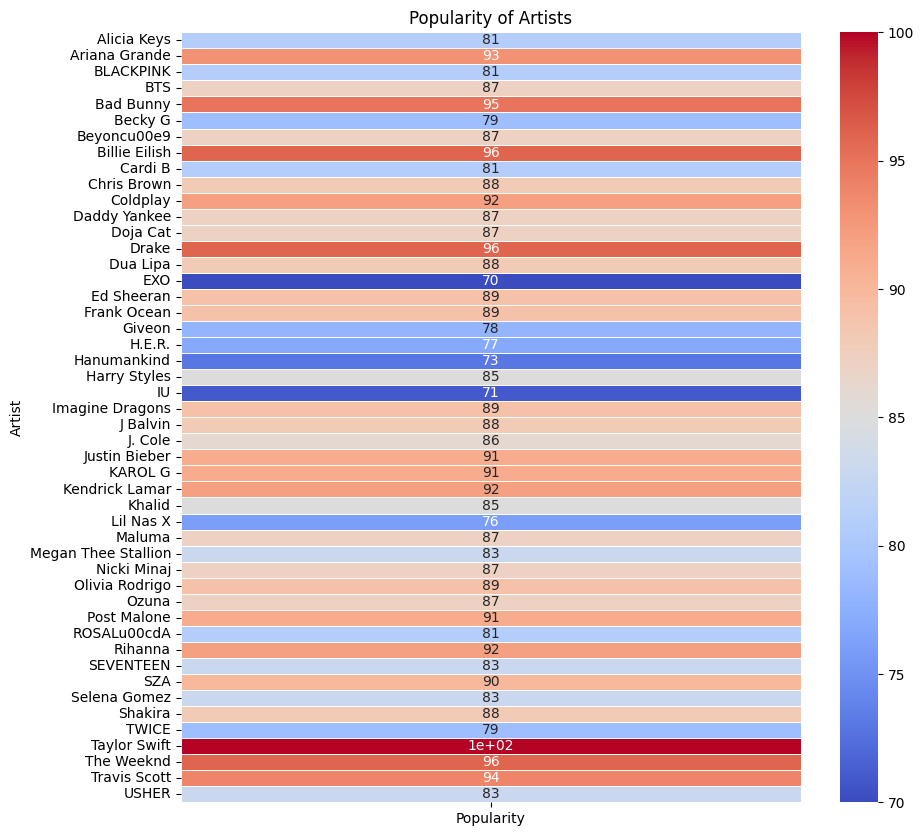

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Extract popularity data from local_data
popularity = [artist['popularity'] for artist in local_data[0]['value']['artists']]

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame({'Artist': artist_names, 'Popularity': popularity})

# Pivot the DataFrame to get the correct format for the heatmap
heatmap_data = heatmap_df.pivot_table(index='Artist', values='Popularity', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Popularity of Artists')
plt.show()

In [23]:
# Assuming we have a DataFrame `df` with columns 'Artist', 'Followers', and 'Genres'
# Create a DataFrame with artist names, followers, and genres
data = {
    'Artist': [artist['name'] for artist in local_data[0]['value']['artists']],
    'Followers': [artist['followers']['total'] for artist in local_data[0]['value']['artists']],
    'Genres': [', '.join(artist['genres']) for artist in local_data[0]['value']['artists']]
}

df_artists = pd.DataFrame(data)

# Calculate the correlation between followers and genres
# First, we need to create a binary matrix for genres
flat_genres = [genre for artist in local_data[0]['value']['artists'] for genre in artist['genres']]
genres_list = list(set(flat_genres))
binary_matrix = pd.DataFrame(0, index=df_artists.index, columns=genres_list)

for i, genres in enumerate(df_artists['Genres']):
    for genre in genres.split(', '):
        binary_matrix.at[i, genre] = 1

# Add the followers column to the binary matrix
binary_matrix['Followers'] = df_artists['Followers']

# Calculate the correlation matrix
correlation_matrix = binary_matrix.corr()

# Extract the correlation of genres with followers
followers_correlation = correlation_matrix['Followers'].drop('Followers')

# Print the correlation of each genre with followers
print(followers_correlation)

neo soul                    -0.182621
canadian pop                 0.445112
atl hip hop                 -0.136160
post-teen pop                0.039146
contemporary r&b            -0.136160
r&b en espanol              -0.154241
trap queen                  -0.147245
malayalam hip hop           -0.189719
k-pop boy group             -0.076688
pop r&b                     -0.117840
art pop                      0.269537
permanent wave               0.054906
pop rap                      0.229820
trap latino                 -0.014107
urban contemporary          -0.028951
hip hop                      0.066385
houston rap                 -0.147245
rock                         0.057445
latin viral pop             -0.122925
colombian pop               -0.032330
indian underground rap      -0.189719
singer-songwriter pop        0.337520
north carolina hip hop      -0.079272
modern rock                  0.057445
latin pop                   -0.111626
rap latina                  -0.122925
puerto rican

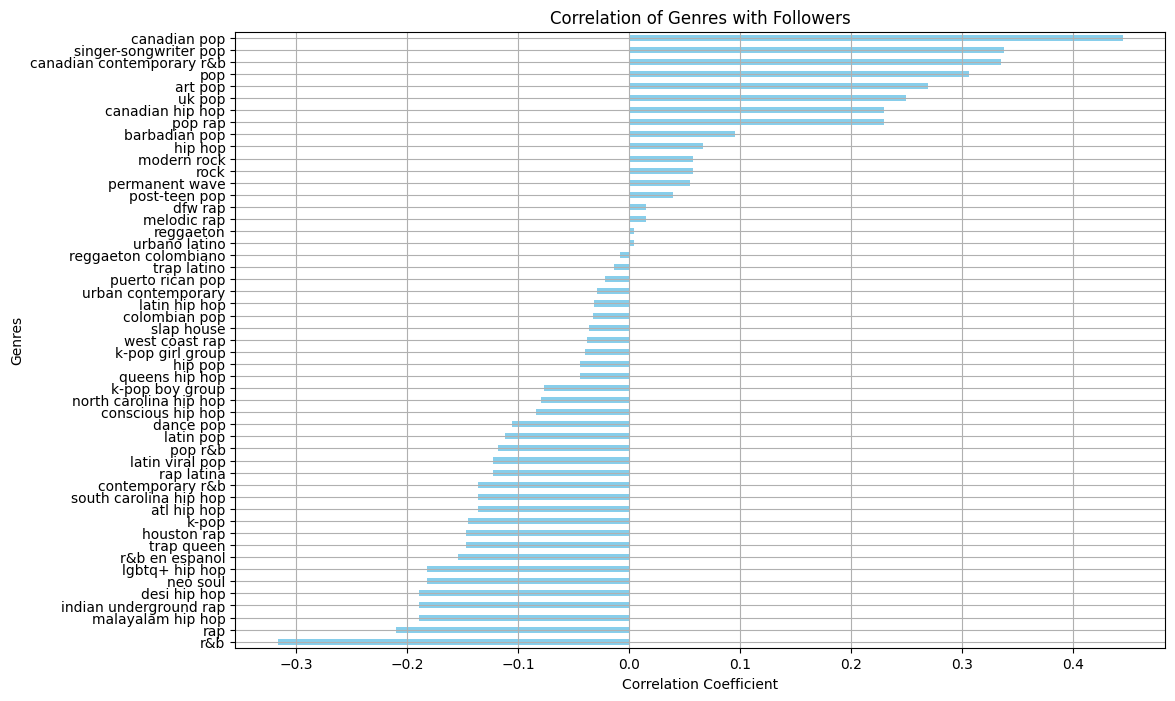

In [22]:
import matplotlib.pyplot as plt

# Plot the correlation of each genre with followers
plt.figure(figsize=(12, 8))
followers_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Genres with Followers')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

In [24]:
# Sort the DataFrame by the 'Popularity' column in descending order
sorted_artists = heatmap_df.sort_values(by='Popularity', ascending=False)

# Print the sorted DataFrame
print(sorted_artists)

                 Artist  Popularity
0          Taylor Swift         100
3         Billie Eilish          96
6            The Weeknd          96
10                Drake          96
37           The Weeknd          96
32            Bad Bunny          95
12         Travis Scott          94
1         Ariana Grande          93
11       Kendrick Lamar          92
21              Rihanna          92
31             Coldplay          92
14          Post Malone          91
35              KAROL G          91
4         Justin Bieber          91
23                  SZA          90
8        Olivia Rodrigo          89
2            Ed Sheeran          89
30      Imagine Dragons          89
26          Frank Ocean          89
33             J Balvin          88
34              Shakira          88
22          Chris Brown          88
5              Dua Lipa          88
16          Nicki Minaj          87
36               Maluma          87
41         Daddy Yankee          87
43                  BTS     